**Table of contents**<a id='toc0_'></a>    
- [Data Loading and Cleaning:](#toc1_)    
- [EDA](#toc2_)    
  - [Species Distribution](#toc2_1_)    
  - [Flipper Length vs. Body Mass](#toc2_2_)    
  - [Island Distribution](#toc2_3_)    
  - [Sex Distribution within Species](#toc2_4_)    
  - [Heatmap of Correlations](#toc2_5_)    
  - [Boxplots for Measurements](#toc2_6_)    
  - [Histograms of Measurements](#toc2_7_)    
- [Conclusions](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Loading and Cleaning:](#toc0_)

In [1]:
import pandas as pd

penguins = pd.read_csv(r'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
penguins_cleaned = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])

In [8]:
penguins_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

# <a id='toc2_'></a>[EDA](#toc0_)

## <a id='toc2_1_'></a>[Species Distribution](#toc0_)

C:\Users\d1411\AppData\Local\Temp\ipykernel_500\2729684344.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins_cleaned, x='species', palette='Set2')


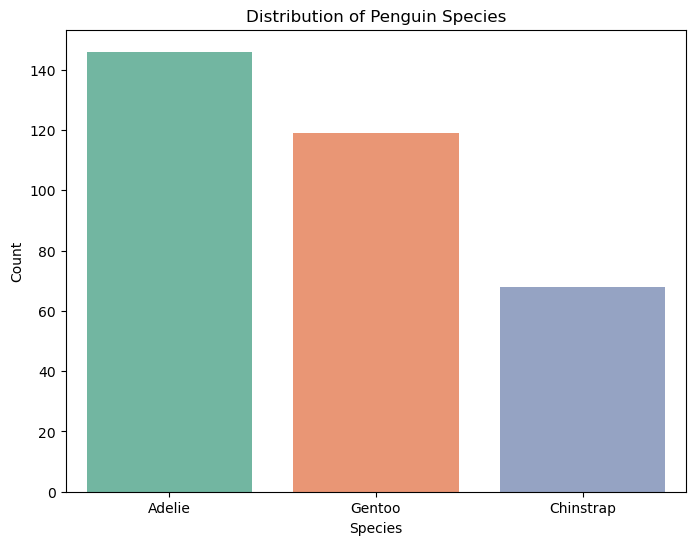

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=penguins_cleaned, x='species', palette='Set2')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

The bar chart showed that the dataset includes three penguin species: Adelie, Chinstrap, and Gentoo. Adelie penguins have the highest count, followed by Gentoo and Chinstrap.

## <a id='toc2_2_'></a>[Flipper Length vs. Body Mass](#toc0_)

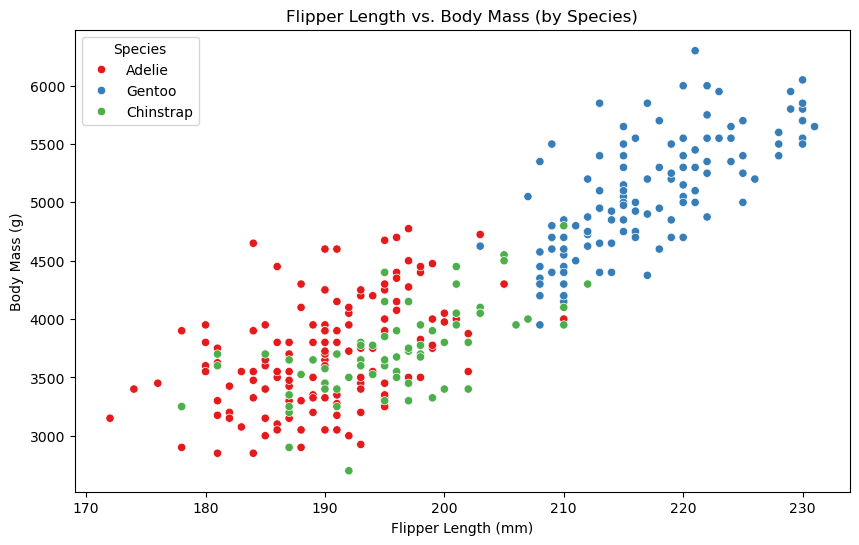

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_cleaned, x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set1')
plt.title('Flipper Length vs. Body Mass (by Species)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')
plt.show()


The scatter plot revealed a strong positive relationship between flipper length and body mass across species. Gentoo penguins tend to have longer flippers and higher body mass, whereas Adelie and Chinstrap penguins have smaller flipper lengths and lighter body mass

## <a id='toc2_3_'></a>[Island Distribution](#toc0_)

In [14]:
island_counts = penguins_cleaned['island'].value_counts()
island_counts

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

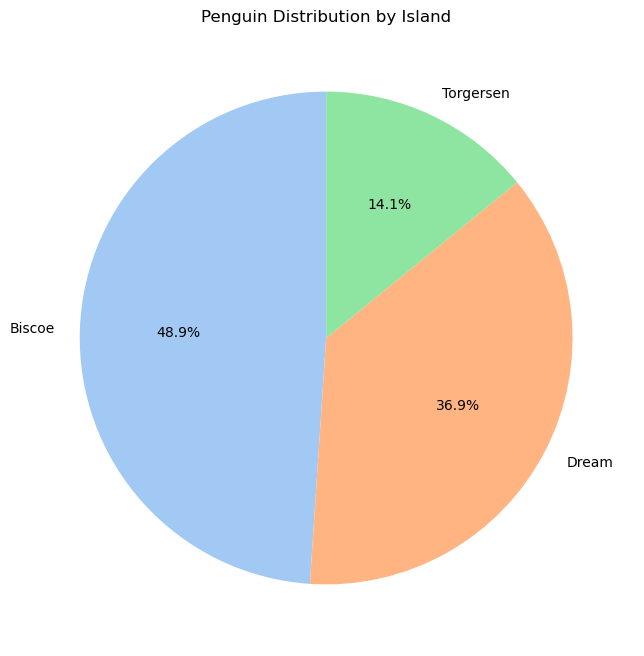

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Penguin Distribution by Island')
plt.show()

The pie chart showed that the penguins are distributed across three islands: Biscoe, Dream, and Torgersen. Biscoe Island contains the majority of the penguins, while Dream and Torgersen host fewer penguins

## <a id='toc2_4_'></a>[Sex Distribution within Species](#toc0_)

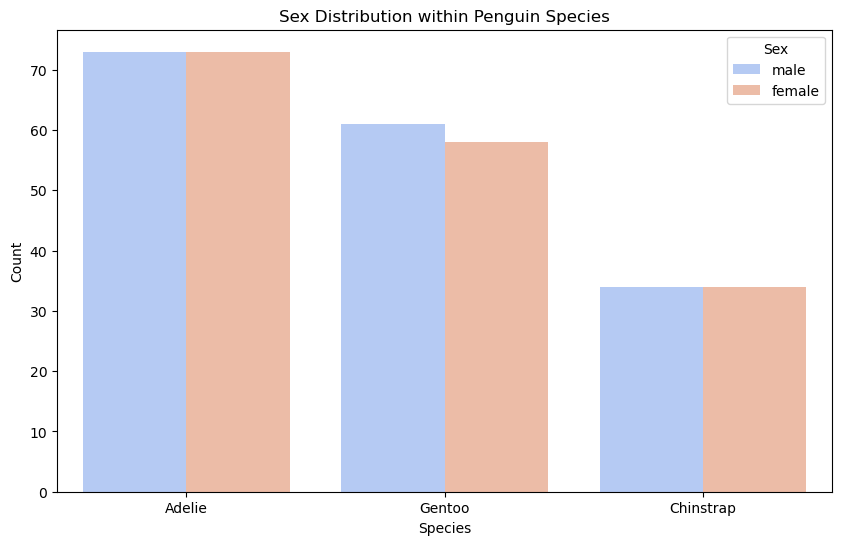

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins_cleaned, x='species', hue='sex', palette='coolwarm')
plt.title('Sex Distribution within Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

The grouped bar chart indicated a relatively even distribution of males and females within each species. However, there is a slight imbalance in some cases, such as Gentoo species, which had more males compared to females.

## <a id='toc2_5_'></a>[Heatmap of Correlations](#toc0_)

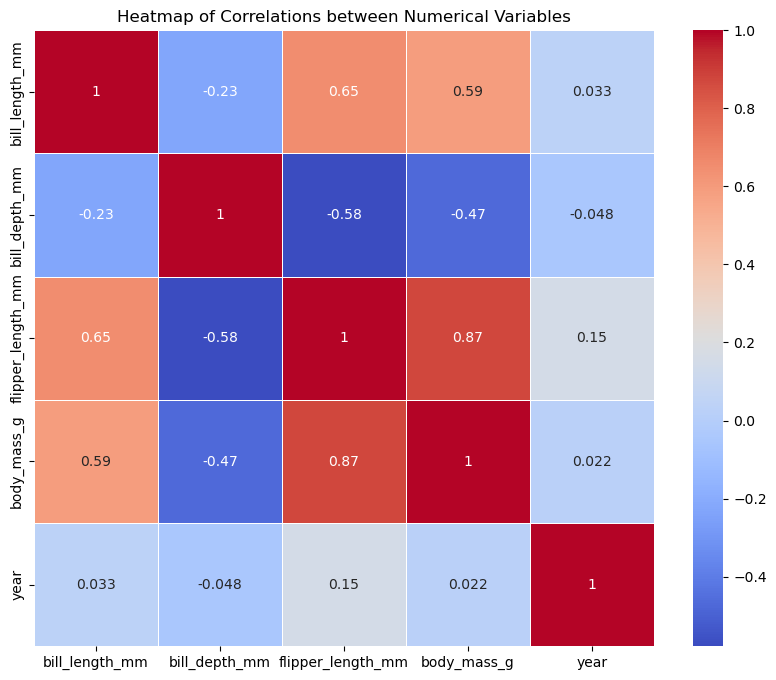

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = penguins_cleaned.corr(numeric_only=True)


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations between Numerical Variables')
plt.show()

The heatmap showed a strong positive correlation between flipper length and body mass. Other moderate correlations were observed between bill length and flipper length, indicating that penguins with longer bills tend to have longer flippers

## <a id='toc2_6_'></a>[Boxplots for Measurements](#toc0_)

C:\Users\d1411\AppData\Local\Temp\ipykernel_500\1151863352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins_cleaned, x='species', y='flipper_length_mm', palette='Set3')
C:\Users\d1411\AppData\Local\Temp\ipykernel_500\1151863352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins_cleaned, x='species', y='body_mass_g', palette='Set2')
C:\Users\d1411\AppData\Local\Temp\ipykernel_500\1151863352.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins_cleaned, x='species', y='bill_length_mm', palette='Set

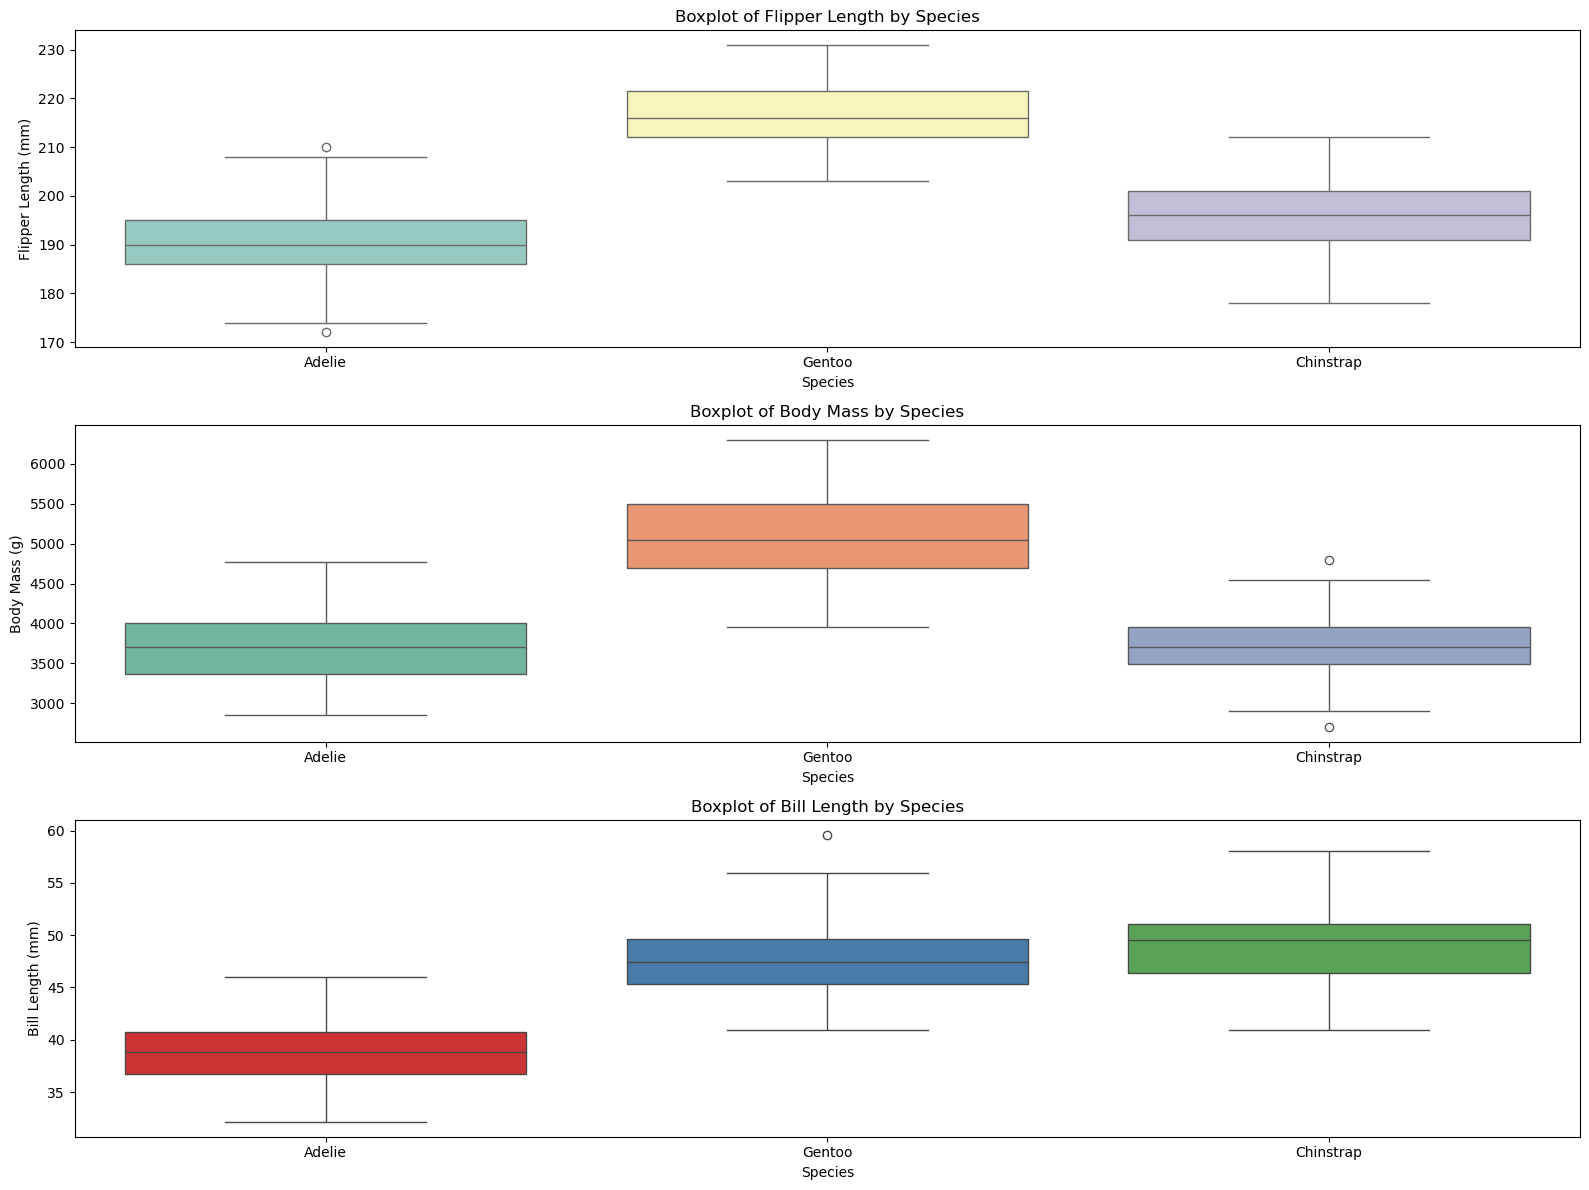

In [21]:
plt.figure(figsize=(16, 12))

# Flipper length boxplot
plt.subplot(3, 1, 1)
sns.boxplot(data=penguins_cleaned, x='species', y='flipper_length_mm', palette='Set3')
plt.title('Boxplot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

# Body mass boxplot
plt.subplot(3, 1, 2)
sns.boxplot(data=penguins_cleaned, x='species', y='body_mass_g', palette='Set2')
plt.title('Boxplot of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')

# Bill length boxplot
plt.subplot(3, 1, 3)
sns.boxplot(data=penguins_cleaned, x='species', y='bill_length_mm', palette='Set1')
plt.title('Boxplot of Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')

plt.tight_layout()
plt.show()


The boxplots provided detailed comparisons of the three penguin species:
Gentoo penguins have significantly longer flippers and higher body mass compared to Adelie and Chinstrap species.
Chinstrap penguins generally have longer bills compared to the other species.

## <a id='toc2_7_'></a>[Histograms of Measurements](#toc0_)

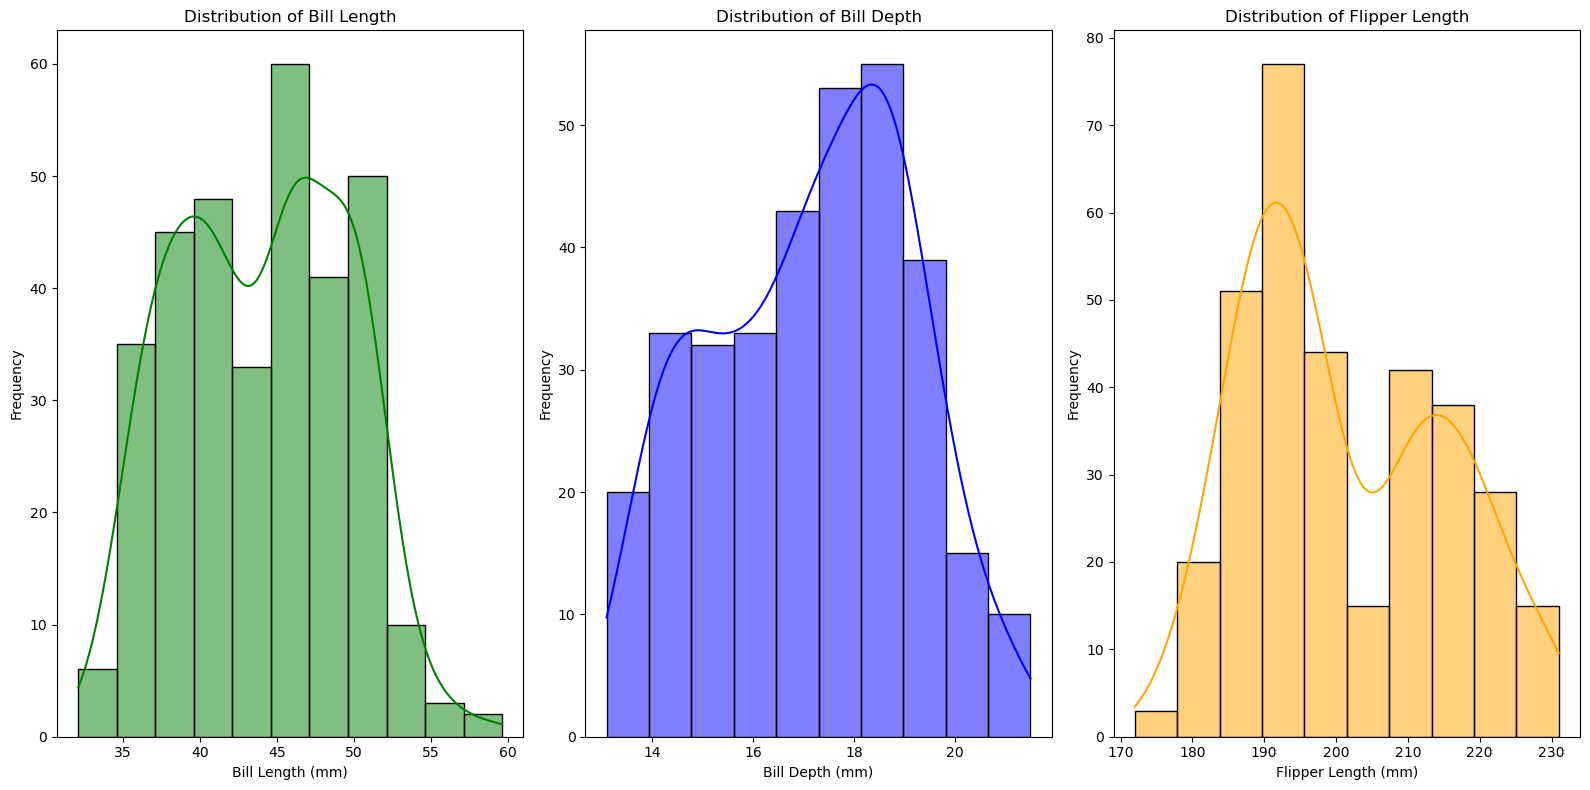

In [22]:
plt.figure(figsize=(16, 8))

# Bill length histogram
plt.subplot(1, 3, 1)
sns.histplot(data=penguins_cleaned, x='bill_length_mm', kde=True, color='green')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')

# Bill depth histogram
plt.subplot(1, 3, 2)
sns.histplot(data=penguins_cleaned, x='bill_depth_mm', kde=True, color='blue')
plt.title('Distribution of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')

# Flipper length histogram
plt.subplot(1, 3, 3)
sns.histplot(data=penguins_cleaned, x='flipper_length_mm', kde=True, color='orange')
plt.title('Distribution of Flipper Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The distribution of bill length is approximately bimodal, with two noticeable peaks around 40 mm and 45 mm. This indicates that there may be two distinct groups of penguins, possibly corresponding to different species.  

The distribution of bill depth appears unimodal and approximately normally distributed. Most penguins have a bill depth between 15 and 18 mm, with a gradual decline towards the tails of the distribution.

The flipper length distribution is slightly right-skewed, with a peak at around 190 mm. The distribution shows a gradual decline as flipper length increases, suggesting that longer flippers are less common in the dataset.

# <a id='toc3_'></a>[Conclusions](#toc0_)

**Species Distribution (Bar Chart):**

The dataset includes three penguin species: Adelie, Chinstrap, and Gentoo. The Adelie species has the highest count, followed by Gentoo and Chinstrap.

**Flipper Length vs. Body Mass (Scatter Plot):**

A strong positive relationship was observed between flipper length and body mass across species. Gentoo penguins tend to have longer flippers and higher body mass compared to Adelie and Chinstrap penguins, which have smaller flippers and lighter body mass.

**Island Distribution (Pie Chart):**

Penguins are distributed across three islands: Biscoe, Dream, and Torgersen. The majority are found on Biscoe Island, while Dream and Torgersen host fewer penguins.

**Sex Distribution within Species (Grouped Bar Chart):**

The grouped bar chart indicated a relatively even distribution of males and females within each species. However, there is a slight imbalance in some cases, such as the Gentoo species, which had more males compared to females.

**Heatmap of Correlations:**

The heatmap showed a strong positive correlation between flipper length and body mass. Additionally, a moderate correlation exists between bill length and flipper length, indicating that penguins with longer bills also tend to have longer flippers.

**Boxplots for Flipper Length, Body Mass, and Bill Measurements:**

The boxplots revealed that Gentoo penguins have significantly longer flippers and higher body mass compared to Adelie and Chinstrap species. Chinstrap penguins tend to have longer bills compared to the other species.